<a href="https://colab.research.google.com/github/GeorgeShmelin/DA-03.09.2024/blob/main/Lies_assigment_repeat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import plotly.offline as py

In [ ]:
import seaborn as sns

In [ ]:
df_original = pd.read_csv('https://raw.githubusercontent.com/GeorgeShmelin/my-gitproject/main/churn_data_before_processing.csv', index_col = 0)

In [ ]:
df_original.shape

(10150, 14)

In [ ]:
df_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,NaN,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0


In [ ]:
df_original.drop(['RowNumber'], axis = 1, inplace = True)

In [ ]:
df_original.sample(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3716,15699492,Lorenzo,665.0,Germany,Female,27.0,2.0,147435.96,1.0,0.0,0.0,187508.06,0
9822,15781298,Hughes,808.0,Germany,Male,39.0,3.0,124216.93,1.0,0.0,1.0,171442.36,0
582,15576352,Revell,586.0,Spain,Female,57.0,3.0,0.00,2.0,0.0,1.0,6057.81,0


In [ ]:
df_original.tail(2) # the bottom line?

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4590,15680167,Thomson,635.0,France,Female,78.0,6.0,47536.40,1.0,NaN,1.0,119400.08,0
8,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0


In [ ]:
df_original.dtypes

CustomerId           int64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df_original.info

<bound method DataFrame.info of       CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
0       15634602  Hargrave        619.0    France  Female  42.0     2.0   
1       15647311      Hill        608.0     Spain  Female  41.0     1.0   
2       15619304      Onio        502.0    France  Female  42.0     8.0   
3       15701354      Boni        699.0    France  Female  39.0     1.0   
4       15737888  Mitchell        850.0     Spain  Female  43.0     2.0   
...          ...       ...          ...       ...     ...   ...     ...   
3612    15792151  Hamilton        635.0     Spain  Female  37.0     3.0   
4437    15779522    Efimov        736.0    France  Female  24.0     0.0   
6549    15792029       Lee        620.0    France    Male  32.0     6.0   
4590    15680167   Thomson        635.0    France  Female  78.0     6.0   
8       15792365        He        501.0    France    Male  44.0     4.0   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  Estimate

In [ ]:
pd.isna(df_original).sum()  # or pd.isna(df).any()

CustomerId           0
Surname             94
CreditScore         18
Geography          196
Gender             283
Age                271
Tenure              80
Balance            156
NumOfProducts      288
HasCrCard           83
IsActiveMember      87
EstimatedSalary     44
Exited               0
dtype: int64

In [ ]:
df_original.duplicated().sum() # ? - I should check further

104

As **df** gradually will be cleaned and updated, I need **df_origina**l for references to the original DATA I got

In [ ]:
df = df_original

# --------------------------------------------------------------------------------

# **CustomerId**

In [ ]:
df.CustomerId.dtypes

dtype('int64')

In [ ]:
df.CustomerId.isna().sum()

0

In [ ]:
df.CustomerId.value_counts(dropna = False)

15733661    3
15775490    2
15618155    2
15604818    2
15566740    2
           ..
15726796    1
15754952    1
15652192    1
15681924    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

In [ ]:
df.CustomerId.duplicated().sum() # to check

150

In [ ]:
df.shape

(10150, 13)

In [ ]:
len(df.CustomerId.unique()) #  ~151 look duplicated

10000

In [ ]:
df.loc[df.CustomerId.duplicated(keep = False)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0
26,15736816,Young,756.0,NaN,Male,36.0,2.0,136815.64,NaN,1.0,1.0,170041.95,0
151,15759618,Alexeeva,535.0,France,Female,48.0,9.0,0.00,1.0,1.0,0.0,149892.79,1
220,15725311,Hay,726.0,France,Female,31.0,9.0,114722.05,2.0,1.0,1.0,98178.57,0
227,15676895,Cattaneo,547.0,Germany,Female,39.0,6.0,74596.15,3.0,1.0,1.0,85746.52,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,15792151,Hamilton,635.0,Spain,Female,37.0,3.0,0.00,2.0,1.0,0.0,91086.73,0
4437,15779522,Efimov,736.0,France,Female,24.0,0.0,0.00,2.0,1.0,0.0,109355.73,1
6549,15792029,Lee,620.0,France,Male,32.0,6.0,0.00,2.0,1.0,0.0,56139.09,0
4590,15680167,Thomson,635.0,France,Female,78.0,6.0,47536.40,1.0,NaN,1.0,119400.08,0


In [ ]:
df.loc[df.CustomerId.isin([15792365, 15725311])] # index 220 - Gender

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0
220,15725311,Hay,726.0,France,Female,31.0,9.0,114722.05,2.0,1.0,1.0,98178.57,0
220,15725311,Hay,726.0,France,NaN,31.0,9.0,114722.05,2.0,1.0,1.0,98178.57,0
8,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0


In [ ]:
df.loc[df.duplicated(subset=['CustomerId', 'Surname', 'Balance'],keep=False)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0
26,15736816,Young,756.0,NaN,Male,36.0,2.0,136815.64,NaN,1.0,1.0,170041.95,0
151,15759618,Alexeeva,535.0,France,Female,48.0,9.0,0.00,1.0,1.0,0.0,149892.79,1
220,15725311,Hay,726.0,France,Female,31.0,9.0,114722.05,2.0,1.0,1.0,98178.57,0
227,15676895,Cattaneo,547.0,Germany,Female,39.0,6.0,74596.15,3.0,1.0,1.0,85746.52,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,15792151,Hamilton,635.0,Spain,Female,37.0,3.0,0.00,2.0,1.0,0.0,91086.73,0
4437,15779522,Efimov,736.0,France,Female,24.0,0.0,0.00,2.0,1.0,0.0,109355.73,1
6549,15792029,Lee,620.0,France,Male,32.0,6.0,0.00,2.0,1.0,0.0,56139.09,0
4590,15680167,Thomson,635.0,France,Female,78.0,6.0,47536.40,1.0,NaN,1.0,119400.08,0


In [ ]:
# repeating values to deal with

In [ ]:
df.drop_duplicates(subset= ['CustomerId', 'Surname', 'Balance'], keep = 'first', inplace =True)

In [ ]:
df.shape

(10006, 13)

In [ ]:
df.loc[df.CustomerId.duplicated(keep = False)] # Even, now it should be checked further

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2105,15615096,Costa,492.0,France,Female,NaN,7.0,0.00,2.0,1.0,1.0,49463.44,0
3207,15652400,Moss,667.0,Spain,Male,56.0,2.0,168883.08,1.0,0.0,1.0,18897.78,0
5871,15709920,Burke,479.0,France,Female,33.0,2.0,208165.53,1.0,0.0,0.0,50774.81,1
6347,15754820,Bergamaschi,637.0,Germany,Male,35.0,8.0,147127.81,2.0,1.0,1.0,84760.70,0
6496,15789313,Ugorji,595.0,Germany,Female,44.0,4.0,96553.52,2.0,1.0,0.0,143952.24,1
9504,15591724,Liu,560.0,France,Female,44.0,5.0,143244.97,1.0,1.0,0.0,98661.27,0
2105,15615096,Costa,492.0,France,Female,31.0,7.0,NaN,2.0,1.0,1.0,49463.44,0
9504,15591724,Liu,560.0,France,Female,44.0,5.0,NaN,1.0,1.0,0.0,98661.27,0
6347,15754820,Bergamaschi,637.0,Germany,Male,35.0,8.0,NaN,2.0,1.0,1.0,84760.70,0
5871,15709920,Burke,479.0,France,Female,33.0,2.0,NaN,1.0,0.0,0.0,50774.81,1


In [ ]:
len(df.loc[df.CustomerId.duplicated(keep = False)]) # Limited number, could be checked more carefully

12

In [ ]:
df.loc[df.CustomerId.isin([15615096])] # 'Balance', to check all that left

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2105,15615096,Costa,492.0,France,Female,NaN,7.0,0.0,2.0,1.0,1.0,49463.44,0
2105,15615096,Costa,492.0,France,Female,31.0,7.0,NaN,2.0,1.0,1.0,49463.44,0


Looks as simply some mess in ‘Balance’ – I am going to leave ‘first’ as duplicates     
In my view it’s a reasonable compromise in this case


In [ ]:
df.drop_duplicates(subset= ['CustomerId', 'Surname'], keep = 'first', inplace =True)

In [ ]:
df.shape

(10000, 13)

In [ ]:
df.CustomerId.duplicated().sum() # looks much better

0

In [ ]:
# customerID (if to keep) should finaly be a non-numeric, categorical value

# **Surname**

In [ ]:
df.Surname.dtypes

dtype('O')

In [ ]:
df.Surname = df.Surname.astype(str)

In [ ]:
df['Surname'].value_counts(dropna = False)

nan         92
Smith       32
Martin      29
Scott       29
Walker      28
            ..
Valentin     1
Izmailov     1
Bold         1
Bonham       1
Burbidge     1
Name: Surname, Length: 2926, dtype: int64

In [ ]:
# NaN values

In [ ]:
len(df['Surname'].unique()) - 1   # number or surnames in the data

2925

In [ ]:
df.Surname.isna().sum()

0

In [ ]:
df.Surname.str.len()  # checking for nonsense staff

0       8
1       4
2       4
3       4
4       8
       ..
9995    8
9996    9
9997    3
9998    9
9999    6
Name: Surname, Length: 10000, dtype: int64

In [ ]:
df.Surname.loc[df.Surname.str.len() < 4] # doesn't work here well

5       Chu
8        He
9       nan
12      Kay
19      Hao
       ... 
9943     Fu
9949    Wan
9951     Ho
9969    Hou
9997    Liu
Name: Surname, Length: 845, dtype: object

In [ ]:
df.loc[df.Surname == 'nan']

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9,15592389,nan,684.0,France,Male,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73,0
329,15624528,nan,664.0,Germany,Male,26.0,7.0,116244.14,2.0,1.0,1.0,95145.14,0
437,15624623,nan,516.0,France,Male,35.0,10.0,104088.59,2.0,0.0,0.0,119666.00,0
941,15676521,nan,696.0,France,Female,NaN,8.0,0.00,2.0,0.0,0.0,191074.11,0
970,15805955,nan,638.0,France,Female,48.0,10.0,138333.03,1.0,1.0,1.0,47679.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9633,15668057,nan,669.0,France,Female,31.0,6.0,113000.66,1.0,1.0,0.0,40467.82,0
9704,15759872,nan,625.0,France,Male,22.0,9.0,0.00,2.0,1.0,0.0,157072.91,0
9792,15787168,nan,819.0,Spain,Female,28.0,8.0,168253.21,1.0,1.0,1.0,102799.14,0
9857,15779423,nan,716.0,France,Male,39.0,1.0,70657.61,2.0,1.0,1.0,76476.05,0


*All those ‘nan’ points look as real accounts’ value, and also –
I don’t need real customers’ surnames for a math prediction model –        I’ll leave the DATA as it is here*

# **CreditScore**

In [ ]:
df.CreditScore.dtype

dtype('float64')

In [ ]:
df.CreditScore.value_counts(dropna = False)

850.0    231
678.0     63
655.0     54
667.0     53
705.0     52
        ... 
363.0      1
399.0      1
358.0      1
359.0      1
419.0      1
Name: CreditScore, Length: 463, dtype: int64

In [ ]:
df.CreditScore.isna().sum() # Also, to consider

18

In [ ]:
df.CreditScore.describe()

count    9982.000000
mean      650.902076
std       100.409554
min       350.000000
25%       584.000000
50%       652.000000
75%       718.000000
max      2924.008649
Name: CreditScore, dtype: float64

In [ ]:
CreditScore_median = df.CreditScore.median()

In [ ]:
df.loc[df.CreditScore.isna(), 'CreditScore'] = CreditScore_median

In [ ]:
df[df.CreditScore == CreditScore_median].sample(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
649,15703119,Liang,652.0,France,Male,38.0,6.0,0.00,2.0,NaN,1.0,145700.22,0
8846,15616365,Obiuto,652.0,France,Female,53.0,2.0,0.00,2.0,1.0,0.0,28045.77,0
9918,15574480,Ubanwa,652.0,Spain,Male,31.0,1.0,132862.59,1.0,0.0,0.0,158054.49,0


In [ ]:
df.CreditScore.isna().sum() # looks better

0

<Axes: >

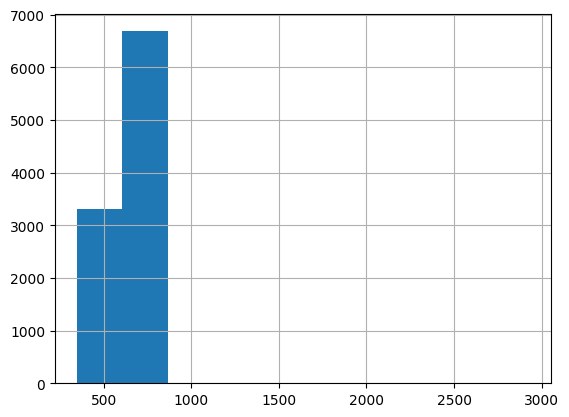

In [ ]:
df_original.CreditScore.hist() # some too big numbers, may just to check

<Axes: >

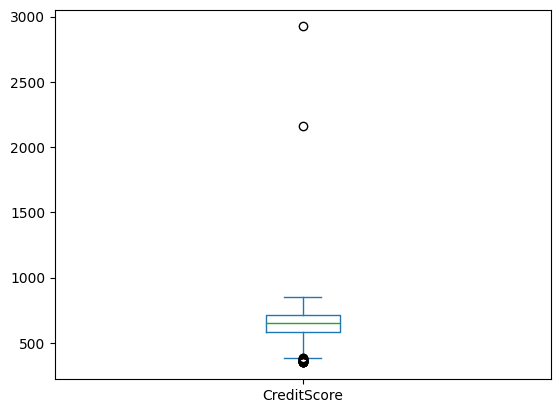

In [ ]:
df_original.CreditScore.plot(kind = 'box') # those 2 outliers should be further check

In [ ]:
df.CreditScore.loc[df.CreditScore > 1500] # I will solve it a bit lower at 'Balance'

2258    2158.510025
8493    2924.008649
Name: CreditScore, dtype: float64

In [ ]:
df.CreditScore.astype(int)

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

In [ ]:
df.CreditScore.dtype # ?

dtype('float64')

# **Geography**

In [ ]:
df.Geography.dtype

dtype('O')

In [ ]:
df.Geography = df.Geography.astype(str)

In [ ]:
df.Geography.isna().sum() # check

0

In [ ]:
df.Geography.value_counts(dropna = False)

France     4923
Germany    2451
Spain      2431
nan         195
Name: Geography, dtype: int64

In [ ]:
# NaN values as nan

In [ ]:
df.loc[df.Geography == 'nan'].sample(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3464,15689031,Murphy,697.0,nan,Female,37.0,7.0,168066.87,1.0,1.0,0.0,35450.53,0
2082,15617617,Stewart,811.0,nan,Male,39.0,7.0,0.00,2.0,1.0,1.0,177519.39,0
816,15734565,Hughes,696.0,nan,NaN,29.0,8.0,0.00,2.0,1.0,0.0,191166.09,0


In [ ]:
df.replace({ 'Geography': {'nan' : 'non_avail'}},inplace=True)
df.loc[df.Geography == 'non_avail'].sample(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9562,15627027,Shih,738.0,non_avail,Male,39.0,5.0,0.0,2.0,1.0,1.0,114388.98,0
7000,15739548,Johnson,775.0,non_avail,Male,28.0,9.0,111167.7,1.0,1.0,0.0,149331.01,0


In [ ]:
df.Geography.value_counts() # 652.0 2  -? Appearing periodically? - should be checked

France       4923
Germany      2451
Spain        2431
non_avail     195
Name: Geography, dtype: int64

In [ ]:
df_original.loc[df_original.Geography.isin([652.0])] # should be checked

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df.loc[df.Geography.isin([652.0])] # 652.0 – is MEDIAN for ‘CreditScore’, looks as those 2 values appeared even before me

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df.shape

(10000, 13)

In [ ]:
df = df.loc[df.Age < 120] # should delete this 'Geography' = 652.0    Looks very strange, but I failed to delete it a couple of times previously

In [ ]:
df.shape # double check

(9739, 13)

# **Gender**

In [ ]:
df.Gender.dtype

dtype('O')

In [ ]:
df.Gender.isna().sum()

271

In [ ]:
df.Gender.value_counts(dropna = False)

Male      5178
Female    4290
NaN        271
Name: Gender, dtype: int64

In [ ]:
# same issue with NaN/nan values

In [ ]:
df.Gender = df.Gender.astype(str)

<ipython-input-73-f4f6b9f40973>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.replace({ 'Gender': {'nan' : 'non_declared'}},inplace=True)


<ipython-input-74-5bd60ede0e75>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.loc[df.Gender == 'non_declared'].sample()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8005,15632848,Ferrari,634.0,France,non_declared,36.0,1.0,69518.95,1.0,1.0,0.0,116238.39,0


In [ ]:
df.Gender.value_counts()

Male            5178
Female          4290
non_declared     271
Name: Gender, dtype: int64

# **Age**

In [ ]:
df.Age.dtype

dtype('float64')

In [ ]:
df.Age.value_counts(dropna = False)

 37.0    467
 38.0    464
 35.0    463
 36.0    441
 34.0    429
        ... 
-23.0      1
 88.0      1
 85.0      1
 83.0      1
-49.0      1
Name: Age, Length: 72, dtype: int64

In [ ]:
df.Age.isna().sum() # to check

0

In [ ]:
df.Age.describe()

count    9739.000000
mean       38.950816
std        10.560797
min       -49.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

In [ ]:
df.loc[df.Age < 0]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1383,15696637,Sung,571.0,France,Female,-23.0,10.0,151097.28,1.0,0.0,1.0,17163.75,0
9783,15680430,Ajuluchukwu,601.0,Germany,Female,-49.0,4.0,96252.98,2.0,1.0,NaN,104263.82,0


In [ ]:
df.loc[df.Age < 0, 'Age'] = - df.Age.loc[df.Age < 0]

In [ ]:
df.Age.describe()

count    9739.000000
mean       38.965602
std        10.506106
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

<Axes: >

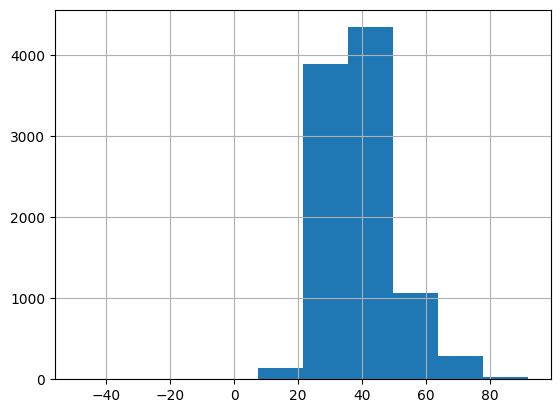

In [ ]:
df_original.Age.hist()

<Axes: >

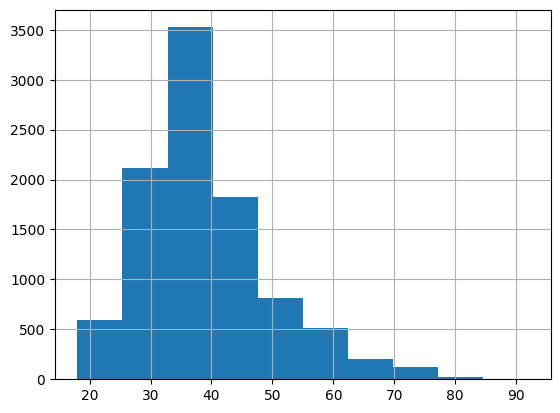

In [ ]:
df.Age.hist() # now looks more reasonable

In [ ]:
len(df[df.Age < 18])

0

In [ ]:
len(df[df.Age <= 18]) # looks OK

22

In [ ]:
Age_median = df.Age.median()
df.loc[df.Age.isna(), 'Age'] = Age_median

In [ ]:
df.Age.astype(int)

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 9739, dtype: int64

# **Tenure**

In [ ]:
df.Tenure.dtype

dtype('float64')

In [ ]:
df.Tenure.value_counts(dropna = False)

 2.000000     1010
 8.000000      998
 1.000000      996
 7.000000      985
 5.000000      981
 3.000000      979
 4.000000      960
 9.000000      949
 6.000000      932
 10.000000     470
 0.000000      401
 NaN            76
 32.044103       1
-5.000000        1
Name: Tenure, dtype: int64

In [ ]:
df.Tenure = df.Tenure.astype(str)

<ipython-input-92-40f7790a6b33>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.Tenure = df.Tenure.str.replace('-', '', regex = False)

<ipython-input-93-4dd4ce4ae391>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.Tenure = df.Tenure.astype(float)

<ipython-input-94-6e64126b2d93>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.Tenure.isna().sum() # fine

76

In [ ]:
df.Tenure.fillna(0, inplace = True)

<ipython-input-96-a9969c246ee3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.Tenure.isna().sum() # better

0

In [ ]:
df.Tenure.describe() # max ?

count    9739.000000
mean        4.974540
std         2.925446
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        32.044103
Name: Tenure, dtype: float64

In [ ]:
df.Tenure.astype(int)

0        2
1        1
2        8
3        1
4        2
        ..
9995     5
9996    10
9997     7
9998     3
9999     4
Name: Tenure, Length: 9739, dtype: int64

<Axes: >

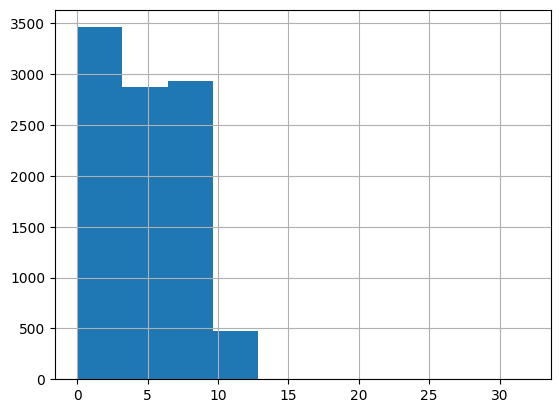

In [ ]:
df.Tenure.hist() # too big value

<Axes: >

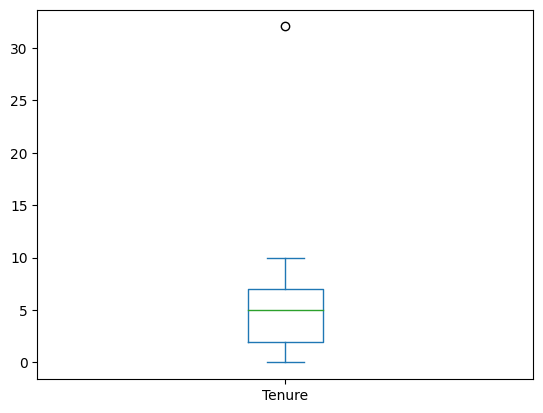

In [ ]:
df.Tenure.plot(kind = 'box')

In [ ]:
df[df.Tenure > 50]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# **Balance**

In [ ]:
df.Balance.dtype

dtype('float64')

In [ ]:
df.Balance.value_counts(dropna = False)

0.00         3462
NaN           142
105473.74       2
130170.82       2
155271.83       1
             ... 
161637.75       1
118838.75       1
143988.00       1
111363.10       1
130142.79       1
Name: Balance, Length: 6135, dtype: int64

In [ ]:
df.Balance.isna().sum() # fine

142

In [ ]:
df.Balance.describe()

count    9.597000e+03
mean     7.672834e+04
std      6.373222e+04
min      0.000000e+00
25%      0.000000e+00
50%      9.718862e+04
75%      1.276605e+05
max      1.036826e+06
Name: Balance, dtype: float64

In [ ]:
# NaN values

<Axes: >

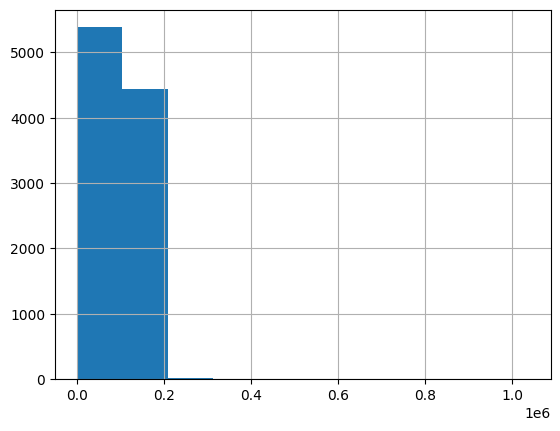

In [ ]:
df_original.Balance.hist() # also, some too big numbers

<Axes: >

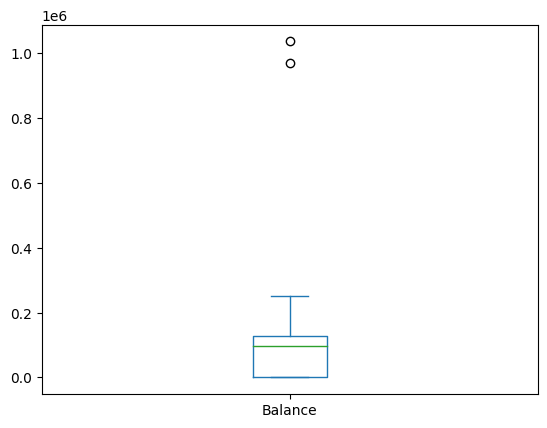

In [ ]:
df_original.Balance.plot(kind = 'box') # 2 points to check

In this case – the DATA was taken from a real banking, thus Balance could be potentially real (should be additionally check). But I can’t simply reject a situation, that to an account was transferred an amount from an insurance, lottery, etc. Also, the amount is significantly higher than average, so to be introduced to any prediction model, as it should cause problems like overfitting, etc – therefore, I am going to leave those 2 Banking points aside.

In [ ]:
df_original.iloc[2135]

CustomerId              15704284
Surname                Ekechukwu
CreditScore                736.0
Geography                Germany
Gender                      Male
Age                         57.0
Tenure                       9.0
Balance            969780.196938
NumOfProducts                1.0
HasCrCard                    1.0
IsActiveMember               0.0
EstimatedSalary         28434.44
Exited                         1
Name: 2135, dtype: object

In [ ]:
df_original.iloc[5464] # The income is also high here, but I should avoid model’s overfitting

CustomerId               15795540
Surname                      Reye
CreditScore                 556.0
Geography                  France
Gender                     Female
Age                          36.0
Tenure                        2.0
Balance            1036826.076171
NumOfProducts                 1.0
HasCrCard                     0.0
IsActiveMember                1.0
EstimatedSalary         177670.57
Exited                          0
Name: 5464, dtype: object

In [ ]:
df.Balance.loc[df.Balance < 1.276779e+05]

0            0.00
1        83807.86
3            0.00
4       125510.82
5       113755.78
          ...    
9994         0.00
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
Name: Balance, Length: 7199, dtype: float64

CreditScore_outliersFree = dfL.loc[dfL.CreditScore < 2000]        
CreditScore_outliersFree.head()

In [ ]:
df.Balance = df.loc[df.Balance < 1e+06, 'Balance']

<ipython-input-113-0a963392823d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

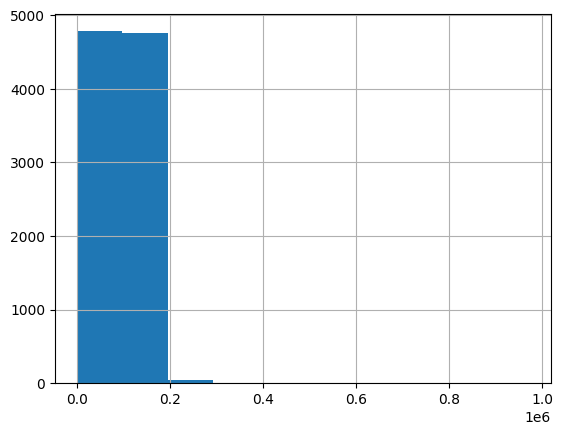

In [ ]:
df.Balance.hist() # For a math prediction model, I’ll need to think how to deal with ‘Balance’ = 0 so plentiful values

Contrary, to Balance in CreditScore I am going to change the value to MEDIAN, not an ideal solution, but at least robust to outliers.
I came from industrial R&D and therefore prefer to use 100% reliable data for my analysis/decisions, but on the over hand – I can’t simply waist too many data points. It should be a compromise.
In this particularly DATA, it is reasonably small and clean – all questionable points wouldn’t exceed more than 10% of all  the data, but in a case of DATA with much higher number of parameters – I will be force to seek a compromise based on assumption and reliability


In [ ]:
df.loc[df.CreditScore > 1500] = df.CreditScore.median()

<Axes: >

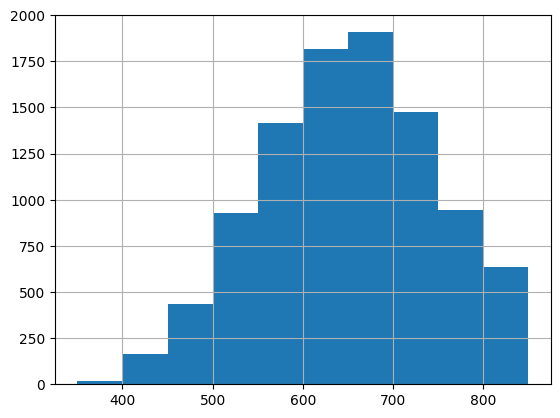

In [ ]:
df.CreditScore.hist() # looks better

# **NumOfProducts**

In [ ]:
df.NumOfProducts.dtype

dtype('float64')

In [ ]:
df.NumOfProducts.value_counts(dropna = False)

 1.00000      4820
 2.00000      4326
 NaN           280
 3.00000       249
 4.00000        56
-2.00000         3
-1.00000         2
 652.00000       2
 11.17746        1
Name: NumOfProducts, dtype: int64

In [ ]:
df.NumOfProducts.isna().sum() # fine

280

In [ ]:
df.NumOfProducts = df.NumOfProducts.astype(str)

<ipython-input-120-46efb20b5227>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.NumOfProducts = df.NumOfProducts.str.replace('-', '', regex = False)

<ipython-input-121-477a804de6bb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.NumOfProducts = df.NumOfProducts.astype(float)

<ipython-input-122-f357ce7e48ac>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.NumOfProducts.describe()

count    9459.000000
mean        1.666791
std         9.476290
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       652.000000
Name: NumOfProducts, dtype: float64

In [ ]:
# NaN values

# **HasCrCard**

In [ ]:
df.HasCrCard.dtype

dtype('float64')

In [ ]:
df.HasCrCard.value_counts(dropna = False)

1.0      6813
0.0      2846
NaN        78
652.0       2
Name: HasCrCard, dtype: int64

In [ ]:
df.HasCrCard.isna().sum() # fine, just to check NaN values

78

In [ ]:
df_original.loc[df_original.HasCrCard.isin([652.0])] # should be checked

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# **IsActiveMember**

In [ ]:
df.IsActiveMember.dtype

dtype('float64')

In [ ]:
df.IsActiveMember.value_counts(dropna = False)

1.0      4975
0.0      4679
NaN        83
652.0       2
Name: IsActiveMember, dtype: int64

In [ ]:
df.IsActiveMember.isna().sum() # fine, NaN values

83

# **EstimatedSalary**

In [ ]:
df.EstimatedSalary.dtype

dtype('float64')

In [ ]:
df.EstimatedSalary.value_counts(dropna = False)

NaN          43
652.00        2
24924.92      2
101348.88     1
55313.44      1
             ..
2465.80       1
47799.15      1
165562.84     1
72927.68      1
38190.78      1
Name: EstimatedSalary, Length: 9695, dtype: int64

In [ ]:
df.EstimatedSalary.isna().sum() # fine, NaN values

43

In [ ]:
df.EstimatedSalary.describe()

count      9696.000000
mean      99964.862261
std       57564.687423
min          11.580000
25%       50755.807500
50%      100168.240000
75%      149340.610000
max      199992.480000
Name: EstimatedSalary, dtype: float64

<Axes: >

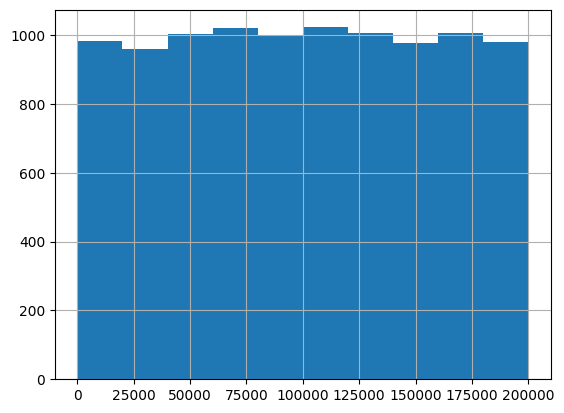

In [ ]:
df_original.EstimatedSalary.hist() # looks reasonable

<Axes: >

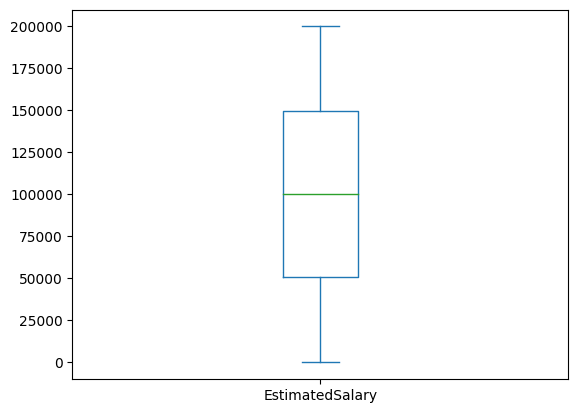

In [ ]:
df_original.EstimatedSalary.plot(kind = 'box') # fine

In [ ]:
# NaN values

# **Exited**

In [ ]:
df.Exited.dtype

dtype('int64')

In [ ]:
df.Exited.value_counts(dropna = False)

0      7758
1      1979
652       2
Name: Exited, dtype: int64

In [ ]:
df.Exited.isna().sum()

0

**--------------------------------------------------------------------------------**

## **FURTHER ACTIONES **

**--------------------------------------------------------------------------------**

'CustomerId' and 'Surname' columns are important for bank information, but for a generalized prediction model those columns not only useless, but also unnecessary – as a math model takes numbers from 'CustomerId' as a numerical parameter – that should be avoided

In [ ]:
df.drop(['CustomerId', 'Surname'], axis = 1, inplace = True)

<ipython-input-142-f1be68da3e58>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8649,850.0,Germany,Female,30.0,3.0,104911.35,2.0,1.0,1.0,42933.26,0
1054,602.0,Spain,Female,22.0,7.0,141604.76,1.0,1.0,0.0,30379.60,0
4452,812.0,Spain,Female,49.0,8.0,66079.45,2.0,0.0,0.0,91556.57,1
7840,537.0,Germany,Female,47.0,4.0,124192.28,2.0,1.0,1.0,50881.51,0
5862,682.0,France,Male,40.0,4.0,0.00,2.0,1.0,1.0,140745.91,0


# **Balance**

In [ ]:
df.Balance.describe()

count      9596.000000
mean      76604.094802
std       62984.167171
min           0.000000
25%           0.000000
50%       97113.395000
75%      127656.530000
max      969780.196938
Name: Balance, dtype: float64

## **+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

**Pivot Table**

In [ ]:
imdb_m =(
    df
    .reset_index()
    .rename(columns={'index' :'LineNr'})
    .melt(
        id_vars='LineNr'
    )
)

In [ ]:
imdb_m.head()

,LineNr,variable,value
0,0,CreditScore,619.0
1,1,CreditScore,608.0
2,2,CreditScore,502.0
3,3,CreditScore,699.0
4,4,CreditScore,850.0


In [ ]:
imdb_m.loc[imdb_m['LineNr'] == 13]

,LineNr,variable,value
13,13,CreditScore,549.0
9752,13,Geography,non_avail
19491,13,Gender,Female
29230,13,Age,25.0
38969,13,Tenure,5.0
48708,13,Balance,0.0
58447,13,NumOfProducts,2.0
68186,13,HasCrCard,0.0
77925,13,IsActiveMember,0.0
87664,13,EstimatedSalary,190857.79


In [ ]:
df_p = (
    imdb_m
    .pivot_table(
        index = 'LineNr',
        columns = 'variable',
        values= 'value',
        aggfunc='first'
    )
)

In [ ]:
df_p.head()

variable,Age,Balance,CreditScore,EstimatedSalary,Exited,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,Tenure
LineNr,,,,,,,,,,,
0,42.0,0.0,619.0,101348.88,1,Female,France,1.0,1.0,1.0,2.0
1,41.0,83807.86,608.0,112542.58,0,Female,Spain,0.0,1.0,1.0,1.0
2,42.0,159660.8,502.0,113931.57,1,Female,France,1.0,0.0,3.0,8.0
3,39.0,0.0,699.0,93826.63,0,Female,France,0.0,NaN,2.0,1.0
4,43.0,125510.82,850.0,79084.1,0,Female,Spain,1.0,1.0,1.0,2.0


In [ ]:
df_p.sum()

<ipython-input-150-88b60e2760ec>:1: FutureWarning:

The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



variable
Age                        380708.0
Balance            735092893.716934
CreditScore               6334171.0
EstimatedSalary    969259304.479998
Exited                         3283
HasCrCard                    8117.0
IsActiveMember               6279.0
NumOfProducts           15766.17746
Tenure                 49737.044103
dtype: object

In [ ]:
df_p.sum().sort_values(ascending = False)

<ipython-input-151-e8ef2daebb26>:1: FutureWarning:

The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



variable
EstimatedSalary    969259304.479998
Balance            735092893.716934
CreditScore               6334171.0
Age                        380708.0
Tenure                 49737.044103
NumOfProducts           15766.17746
HasCrCard                    8117.0
IsActiveMember               6279.0
Exited                         3283
dtype: object

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# **Pivot_Table_genre**

In [ ]:
gender_df = (
    df.Gender.to_frame()
    .assign(temp =1)
    .reset_index()
    .rename(columns={'index':'id'})
    .pivot_table(
        index='id',
        columns='Gender',
        values='temp',
        fill_value=0
    )
)

In [ ]:
gender_df.head()

Gender,652.0,Female,Male,non_declared
id,,,,
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [ ]:
gender_df.sum().sort_values(ascending = False)

Gender
Male            5178
Female          4288
non_declared     271
652.0              2
dtype: int64

**----------------------------------------------------------------------------**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# **----------------------------------------------------------------------------**

In [ ]:
df.shape

(9739, 11)

In [ ]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6721,824.0,Germany,Male,77.0,3.0,27517.15,2.0,0.0,1.0,2746.41,0


In [ ]:
df.dtypes

CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object